In [1]:
import pandas as pd
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
data = pd.read_csv('surface_master.csv')

In [3]:
data.head()

,Unnamed: 0,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,0,2019-01-03,39,0.22,Tuesday,NECR,Mechanical,9.0,18.0,W/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
1,1,2019-01-03,111,0.25,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
2,2,2019-01-03,35,0.30,Tuesday,Finch,Mechanical,9.0,18.0,S/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
3,3,2019-01-03,25,0.50,Tuesday,Don Mills Rd/Eglinton Ave E,Mechanical,9.0,18.0,N/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None
4,4,2019-01-03,36,0.67,Tuesday,Humberwood,Investigation,9.0,18.0,E/B,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44,None


In [5]:
data.describe()

,Unnamed: 0,Route,Time,Min Delay,Min Gap,Vehicle,Year,Month,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h)
count,494169.000000,494169.000000,4.941690e+05,493855.000000,493392.000000,428708.000000,494169.000000,494169.000000,494169.000000,494169.000000,494169.000000,494169.000000,494169.000000,494169.000000,494169.000000,494169.000000,494169.000000
mean,247084.000000,167.907617,6.596399e+01,18.715536,27.504749,5410.035042,2016.142395,6.247972,15.639200,12.415169,3.635914,8.035835,1.103459,0.221479,2.029621,1.856341,40.897980
std,142654.446925,248.292435,7.378415e+03,356.612916,67.871773,3123.756859,1.597574,3.477067,8.795584,11.636509,10.580463,11.017089,2.860924,0.936947,4.663743,4.436335,12.413774
min,0.000000,1.000000,0.000000e+00,-54.000000,-2.000000,0.000000,2014.000000,1.000000,1.000000,-19.300000,-25.800000,-22.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123542.000000,42.000000,7.300000e+00,6.000000,11.000000,1669.000000,2015.000000,3.000000,8.000000,3.000000,-3.500000,-0.300000,0.000000,0.000000,0.000000,0.000000,32.000000
50%,247084.000000,87.000000,1.275000e+01,10.000000,18.000000,7428.000000,2016.000000,6.000000,16.000000,12.600000,3.800000,8.300000,0.000000,0.000000,0.100000,0.000000,38.000000
75%,370626.000000,191.000000,1.617000e+01,15.000000,28.000000,8145.000000,2018.000000,9.000000,23.000000,22.900000,12.900000,17.800000,0.600000,0.000000,1.600000,0.400000,48.000000
max,494168.000000,106117.000000,1.046256e+06,246245.000000,6528.000000,163242.000000,2019.000000,12.000000,31.000000,35.500000,24.500000,29.900000,35.400000,11.200000,42.400000,28.200000,111.000000


In [9]:
days = data.groupby(['Date']).agg({'Min Delay': 'sum', 'Mean Temp': 'mean', 'Precipitation': 'mean', 'Incident': 'count'})
days = days[days['Min Delay'] < 10000]
days = days[days['Precipitation'] > 1]
days.head()

,Min Delay,Mean Temp,Precipitation,Incident
Date,,,,
2014-01-05,6537.0,-1.0,12.9,611
2014-01-06,3428.0,-7.4,4.7,225
2014-01-10,5605.0,-2.5,3.6,528
2014-01-11,4219.0,4.1,8.5,383
2014-01-16,4774.0,-2.9,1.6,332


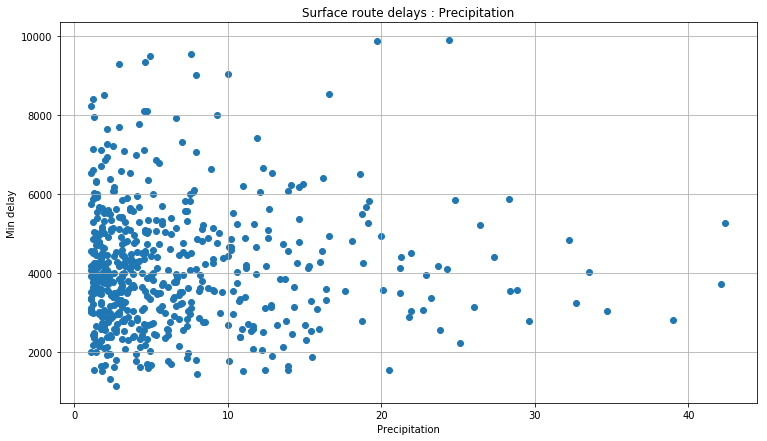

In [39]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(days['Precipitation'], days['Min Delay'])
plt.title("Surface route delays : Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Min delay")

plt.grid()
plt.savefig
plt.show()

In [21]:
#ttest
stats.ttest_ind(days['Precipitation'], days['Incident'])

Ttest_indResult(statistic=-67.35052686308318, pvalue=0.0)

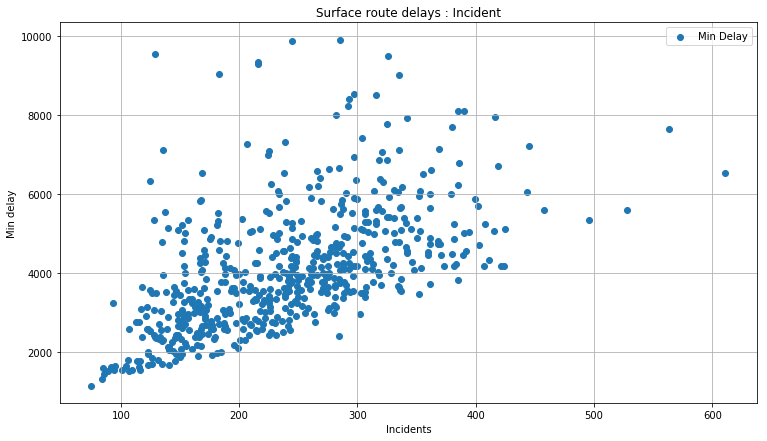

In [37]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(days['Incident'], days['Min Delay'])

ax.set_title("Surface route delays : Incident")
ax.set_xlabel("Incidents")
ax.set_ylabel("Min delay")


plt.grid()
plt.legend()
plt.savefig('Surface route delays due to incidents.png')
plt.show()

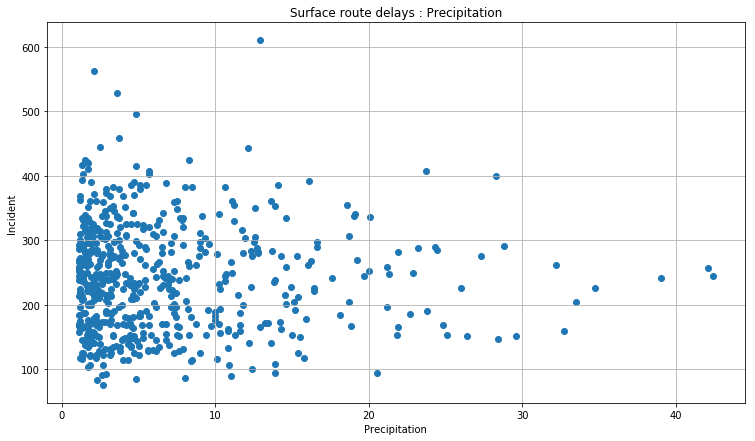

In [33]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(days['Precipitation'], days['Incident'])

ax.set_title("Surface route delays : Precipitation")
ax.set_xlabel("Precipitation")
ax.set_ylabel("Incident")

plt.grid()
plt.savefig('Surface route delays due to Precipitation.png')
plt.show()

In [18]:
#stats.ttest_1samp(days['Precipitation'], days['Incident'])